In [1]:
from selective_recruitment.plotting import make_scatterplot
from selective_recruitment.scripts.script_mapwise import calc_ttest_mean
from selective_recruitment.scripts.script_roi_differences import norm_within_category # for results after normalization
import selective_recruitment.data as ss
import selective_recruitment.regress as ra
import selective_recruitment.region as sroi

from statsmodels.stats.anova import AnovaRM  # perform F test
from scipy.stats import ttest_rel

from pathlib import Path
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

/Users/lshahsha/Documents/GitHub/selective_recruitment/.sr-venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/lshahsha/Documents/GitHub/selective_recruitment/.sr-venv/lib/python3.9/site-packages/torch/__init__.py:614: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/tensor/python_tensor.cpp:453.)
  _C._set_default_tensor_type(t)


In [2]:
# setting working directory
wkdir = 'A:\data\Cerebellum\CerebellumWorkingMemory\selective_recruit'
if not Path(wkdir).exists():
    wkdir = '/srv/diedrichsen/data/Cerebellum/CerebellumWorkingMemory/selective_recruit'
if not Path(wkdir).exists():
    wkdir = '/Users/jdiedrichsen/Data/wm_cerebellum/selective_recruit'
if not Path(wkdir).exists():
    wkdir = '/Volumes/diedrichsen_data$/data/Cerebellum/CerebellumWorkingMemory/selective_recruit'

In [47]:
task = 'fs'
if task == 'fs':
    ses_id = 'ses-01'
    # setting up names and colors
    label_dict = {1: 'LfLs', 2: 'LfMs',
                    3: 'LfHs', 4: 'MfLs',
                    5: 'HfLs', 6:'rest'}
    marker_dict = {1: '^', 2: 'X',
                    3: 'X', 4: 'o',
                    5: 'o', 6: 's'}
    color_dict = {1: 'grey', 2: 'r',
                    3: 'r', 4: 'b',
                    5: 'b', 6: 'g'}
elif task == 'wm':
    ses_id = 'ses-02'
    # setting up names and colors
    label_dict= {1: 'Enc2F', 2: 'Ret2F',
                3: 'Enc2B', 4: 'Ret2B',
                5: 'Enc4F', 6: 'Ret4F',
                7: 'Enc4B', 8: 'Ret4B',
                9: 'Enc6F', 10: 'Ret6F',
                11: 'Enc6B', 12: 'Ret6B',
                13: 'rest'}
    marker_dict = {1: 'o', 2: 'X',
                3: 'o', 4: 'X',
                5: 'o', 6: 'X',
                7: 'o', 8: 'X',
                9: 'o', 10: 'X',
                11: 'o', 12: 'X',
                13: 's'}
    color_dict = {1: 'b', 2: 'b',
                3: 'r', 4: 'r',
                5: 'b', 6: 'b',
                7: 'r', 8: 'r',
                9: 'b', 10: 'b',
                11: 'r', 12: 'r',
                13: 'g'}

In [48]:
# get the summary df with observed and predicted activation within cerebellar parcels

## set params
dataset = "WMFS"
ses_id = ses_id
cerebellum_roi = "HarvardOxBg"
cortex = "Icosahedron1002"
train_dataset = "MDTB"
train_ses_id = 'ses-s1'
method = "L2regression"
type = "CondHalf"
crossed = True
mname_base = f"{train_dataset}_{train_ses_id}_{cortex}_{method}"#f'Fusion_all_{cortex}_L2regression'
mname_ext = "_A6" # if you want to use the fused model, mname_ext will be fuse_id. Use "_A8" for the non-fused model
atlas_space = 'MNIAsymBg2'
space = 'MNI152NLin6Asym'
# # get predicted and observed within region of interest

# D = ss.get_summary_conn(dataset = "WMFS",
#                     ses_id = ses_id,
#                     subj = None,
#                     atlas_space = atlas_space,
#                     space = space,
#                     cerebellum_roi = cerebellum_roi,
#                     cerebellum_roi_selected = None,
#                     cortex_roi = cortex,
#                     type = type,
#                     add_rest = True,
#                     mname_base = mname_base,
#                     mname_ext = mname_ext,
#                     crossed = True)

# # apply regression to get residuals
# # this second regression is implemented because direct comparison of observed and 
# # predicted activation is not possible due to different scaling
# D = ra.roi_regress(D, fit_intercept=True)

# # # save the df
# D.to_csv(wkdir + f'/{task}_ROI_bg_{type}_{train_dataset}_{train_ses_id}_{method}{mname_ext}_reg.tsv', sep='\t')
D = pd.read_csv(wkdir + f'/{task}_ROI_bg_{type}_{train_dataset}_{train_ses_id}_{method}{mname_ext}_reg.tsv', sep='\t')

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
cond_name  7.9647 4.0000 60.0000 0.0000



/Users/lshahsha/Documents/GitHub/selective_recruitment/plotting.py:87: FutureWarning: The provided callable <function mean at 0x1032be4c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df = grouped.agg(agg_kw)
/Users/lshahsha/Documents/GitHub/selective_recruitment/.sr-venv/lib/python3.9/site-packages/statsmodels/stats/anova.py:508: FutureWarning: The provided callable <function mean at 0x1032be4c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  self.data = (self.data


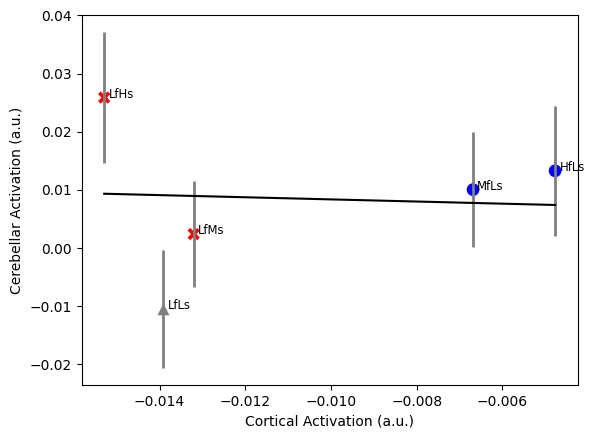

In [51]:
# get the dataframe with the selected region
selected_roi = "AccumbensL"
df = D.loc[(D.roi_name == selected_roi) & (D.cond_name != 'rest')]
make_scatterplot(df, split='cond_num',
                labels=label_dict,
                markers=marker_dict,
                colors=color_dict)
# plt.xlabel("predicted cerebellar activation")
plt.savefig(f"{task}_bg_{selected_roi}_scatter_{mname_base}_{mname_ext}.pdf")
print(AnovaRM(data=df[df.cond_name != 'rest'], depvar='res',subject='sn', within=['cond_name'], aggregate_func=np.mean).fit())

In [ ]:
df